In [73]:
import sqlite3

# Creación de la conexión
connection = sqlite3.connect('../../Labs/lab05-sqlite/chinook.db')

# Creación del cursor que nos permitirá ejecutar consultar y obtener los resultados
cursor = connection.cursor()

# Creamos una consulta
# En este caso consultamos el nombre de las tablas que existen en la base de datos 'chinook.db'
query = '''
PRAGMA table_info(invoices);
'''

# ejecutamos la consulta
cursor.execute(query)

# Obtenemos el resultado de la consulta
results = cursor.fetchall()

# Visualicemos el resultado de nuestra consulta
results

[(0, 'InvoiceId', 'INTEGER', 1, None, 1),
 (1, 'CustomerId', 'INTEGER', 1, None, 0),
 (2, 'InvoiceDate', 'DATETIME', 1, None, 0),
 (3, 'BillingAddress', 'NVARCHAR(70)', 0, None, 0),
 (4, 'BillingCity', 'NVARCHAR(40)', 0, None, 0),
 (5, 'BillingState', 'NVARCHAR(40)', 0, None, 0),
 (6, 'BillingCountry', 'NVARCHAR(40)', 0, None, 0),
 (7, 'BillingPostalCode', 'NVARCHAR(10)', 0, None, 0),
 (8, 'Total', 'NUMERIC(10,2)', 1, None, 0)]

## Queries

In [74]:
# Crea la consulta
q = '''
SELECT strftime('%Y', InvoiceDate) as invyear, BillingCountry, SUM(Total)
FROM invoices
GROUP BY invyear, BillingCountry
;
'''

# Ejecuta la consulta
cursor.execute(q)
# Obtiene resultados
results = cursor.fetchall()
# Imprime
for r in results:
    print(r)

OperationalError: near "GROUP": syntax error

In [70]:
import pandas as pd
df = pd.DataFrame(results)
# Agregar los nombres de columnas
col_titles = ['year','country','total']
df.columns = col_titles
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     5 non-null      object 
 1   country  5 non-null      object 
 2   total    5 non-null      float64
dtypes: float64(1), object(2)
memory usage: 252.0+ bytes


,year,country,total
0,2009,Australia,11.88
1,2009,Austria,1.98
2,2009,Belgium,6.93
3,2009,Brazil,37.62
4,2009,Canada,57.42


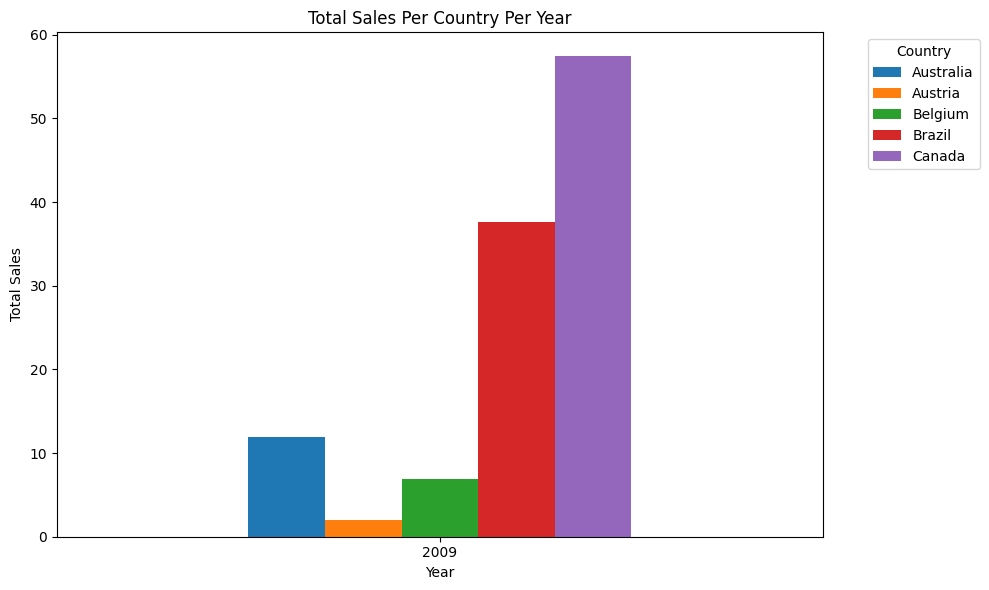

In [71]:
import matplotlib.pyplot as plt

# Pivot the data so that each country becomes a column
pivot_data = df.pivot(index='year', columns='country', values='total')

# Plotting the data
pivot_data.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Total Sales Per Country Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # to make the x labels horizontal
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


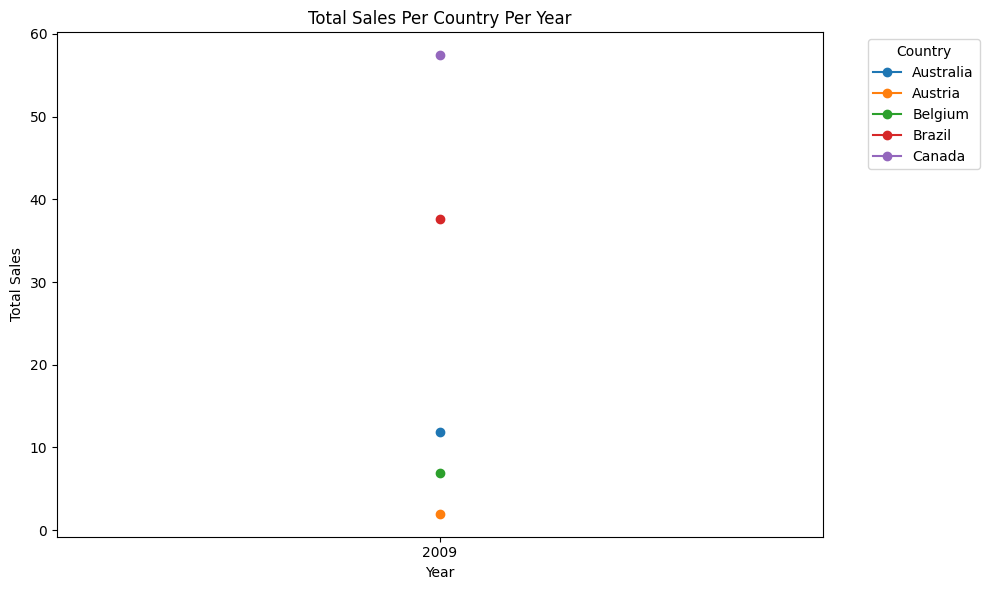

In [72]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is already grouped and has 'year', 'country id', and 'total' columns.

# Plotting the data as a line chart
plt.figure(figsize=(10, 6))

# Plot each country's total sales per year as a line
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['total'], marker='o', label=country)

# Adding labels and title
plt.title('Total Sales Per Country Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
